** </br>Question 3: Corner Detection [2 pts]<br/>**

*_ </br>In this question, you will implement three different versions of the corner detection algorithms for given three input
images (input1.png, input2.png, and input3.png).<br/>_*

**</br> [0.5 pts] Implement corner detection algorithm based on Hessian matrix (H) computation. Note that Hessian
matrix is defined for a given image I at a pixel p such that eigen-decomposition (spectral decomposition) of this matrix yields two eigenvalues as: λ 1 and λ 2 . If both
λ 1 , λ 2 are large, we are at a corner. Provide the detected corners in the resulting output images in color. **


In [6]:
import math
from scipy import ndimage
from PIL import Image
from numpy import *
from matplotlib import pyplot as plt
from pylab import *
import cv2
import time

In [38]:
# input image 
# x vertex of corner
# y vertex of corner
def plott (I,x,y): 

    
        plt.figure()
        plt.imshow(I,cmap = cm.gray) # plots the image in greyscale
        plot(x,y,'r.') # mark the corners in red
        plt.axis([0,len(I[0,:]),len(I[:,0]),0])
        return show()


In [20]:
# gaussian filter func
def gfilter (x,y,s): 
    gfilter = (1/(math.sqrt(2*(math.pi))*s))*exp(-((x**2) + (y**2))/2/s**2)
    return gfilter

In [21]:
#gaussian filter first derivative func
def gfilter1 (x,y,s,z): 
    if(z =='x'):
        gfilter1 = gfilter(x,y,s)*(-x/(s**2))
    elif(z=='y'):
        gfilter1 = gfilter(x,y,s)*(-y/(s**2))
    return gfilter1

In [22]:
#gaussian filter second derivative func
def gfilter2 (x,y,s,z): 
    if(z =='x'):
        gfilter2 = gfilter(x,y,s)*(((x**2)/(s**2))-1)/s**2
    elif(z=='y'):
        gfilter2 = gfilter(x,y,s)*(((x**2)/(s**2))-1)/s**2
    return gfilter2

**Hessian function for marking corners**

In [23]:
# inputt -the input image name
# s -Standard Deviation value
# t -The threshold of eigen value to be considered as edge

def hessian(inputt,s,t):
    
    start = time.time()
    I = array(Image.open(inputt).convert('L')) # reads the input image into I
    G = []
    for i in range(-2,2+1):
        G.append(gfilter(i,0,s)) # equating y to 0 for a 1D matrix
    Gx = []  #gaussian in x direction
    for i in range(-size,size+1):
        Gx.append(gfilter1(i,0,s,'x')) 
    
    Gy = []  #gaussian in y direction
    for i in range(-size,size+1):
        Gy.append([gfilter1(0,i,s,'y')]) 
    
    Gx2 = []
    for i in range(-size,size+1):
        Gx2.append(gfilter2(i,0,s,'x')) 
    
    Gy2 = []
    for i in range(-size,size+1):
        Gy2.append([gfilter2(0,i,s,'y')]) 
    
    Ix = []
    for i in range(len(I[:,0])):
        Ix.extend([convolve(I[i,:],Gx)]) # I*G in x direction
    Ix = array(matrix(Ix))
    Iy = []
    for i in range(len(I[0,:])):
        Iy.extend([convolve(I[:,i],Gx)]) # I*G in y direction
    Iy = array(matrix(transpose(Iy))) 
    
    Ixx = []
    for i in range(len(Ix[:,0])):
        Ixx.extend([convolve(Ix[i,:],Gx2)]) # Ix * Gx in x direction
    Ixx = array(matrix(Ixx))
    
    Iyy = []  
    for i in range(len(Iy[0,:])):
        Iyy.extend([convolve(Ix[:,i],Gx2)]) # Iy * Gy in y direction
    Iyy = array(matrix(transpose(Iyy))) 
    
    Ixy = []
    for i in range(len(Iy[0,:])):
        Ixy.extend([convolve(Ix[:,i],Gx2)]) # Iy * Gy in y direction
    Ixy = array(matrix(transpose(Ixy))) 
    #store values in x,y to plot the corners
    x = [] # array x[] stores x coordinates of the corner
    y = [] # array y[] stores y coordinates of the corner
    for i in range(len(I[:,0])):
        for j in range(len(I[0,:])):
            H1 = linalg.eigvals(([Ixx[i,j],Ixy[i,j]],[Ixy[i,j],Iyy[i,j]]))
            if((abs(H1[0])>t) & (abs(H1[1])>t)): # if corner
                y.append(i-2) # appending y index to mark corners
                x.append(j-2) # appending y index to mark corners
    plott(I,x,y)
    return time.time() - start

In [34]:
s = 1.5 #input standard deviation aka sigma value 

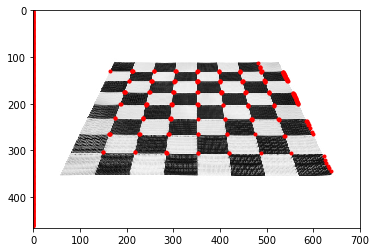

In [41]:
inp1 = hessian('/home/srikar/CVPA1/CVV/input1.png',s,3.95695) # size of filter 3.95695

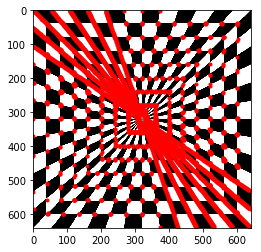

In [42]:
inp2 = hessian('/home/srikar/CVPA1/CVV/input2.png',s,5)

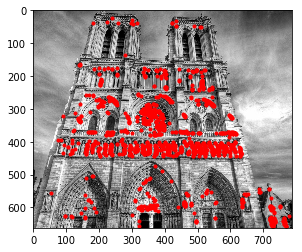

In [47]:
inp3 = hessian('/home/srikar/CVPA1/CVV/input3.png',s,5)

In [48]:
print ('The Accuracy/Time for execution is:\nInput Image 1: %.2fseconds\nInput Image 2: %.2fseconds\nInput Image 3: %.2fseconds)'%(inp1,inp2,inp3))

The Accuracy/Time for execution is:
Input Image 1: 35.86seconds
Input Image 2: 43.94seconds
Input Image 3: 56.55seconds)


** Conclusion **</br> <br/>
_I realized on adjusting the std deviation and eigen threshold values according to the image selected I am getting better results_